# Lab 3: Least Squares Method 


## Introduction
In this lab we will introduce you to the least squares method which is used to reconstruct a line (i.e. find its parameters) from a series of points. 

This lab also serves as an introduction to the CW1: Unknown Signal, which will require you to extend the least squares method to non-linear applications.

As always we'll begin by importing the necessary modules for the lab.

In [71]:
from __future__ import print_function # to avoid issues between Python 2 and 3 printing

import numpy as np
from scipy import stats
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

## 1.  Get some numbers

We'll begin by generating a series of points from a given equation with noise applied.

Generate a sequence of 10 numbers, using the following equation

$$
y_i=0.2+0.5x_i+e_i
$$

where $x_i$ is a *uniformly distributed* random number between 0 and 1 and $e_i$ is a *random* number from $\mathcal{N}(0,0.1)$.

In [72]:
# write your code here

import math

X = np.random.uniform(0,1, 10)

print(X)

Y = 0.2 + 0.5 * X + math.sqrt(.1) * np.random.randn(10)

print(Y)

[0.84117454 0.80987213 0.67588646 0.78984561 0.3538284  0.6482587
 0.92675647 0.61683622 0.59102904 0.31812097]
[0.83908175 1.42345434 0.6516947  0.79676021 0.45756242 0.10509752
 0.54735727 0.48587719 0.58166296 0.68549766]


Generate a scatter plot of $y_i$ versus $x_i$.

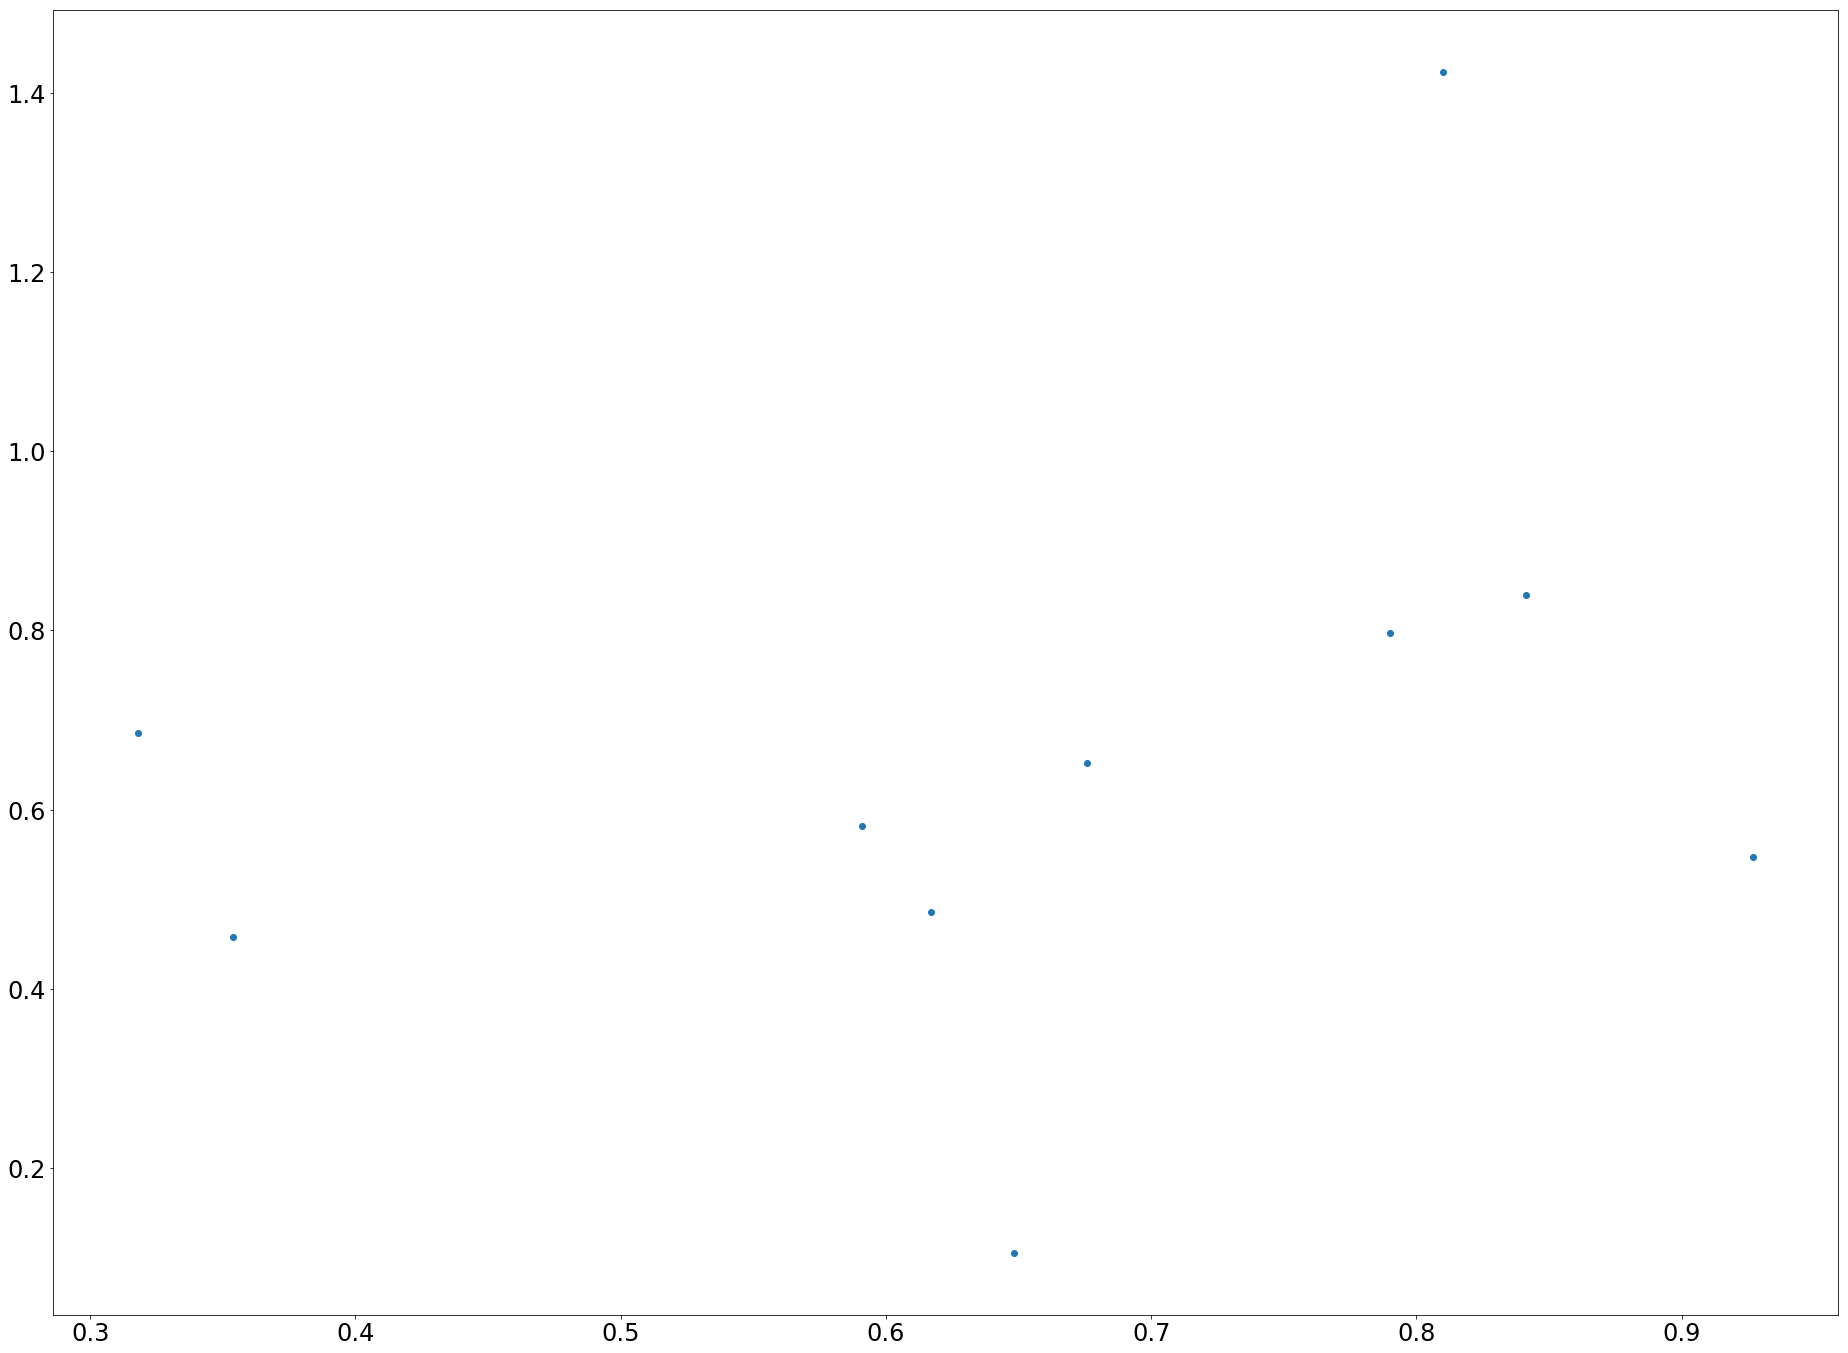

In [73]:
# write your code here

plt.scatter(Y, X)
plt.show()

## 2. Create a general function

Change the above code to a function that receives the parameters $a$, $b$ and $n$ for the equation $y_i = a + b x_i + e_i$ and returns $n$ samples as shown in the previous exercise.  

Use the code to generate 100 samples from the equation above and visualise them.

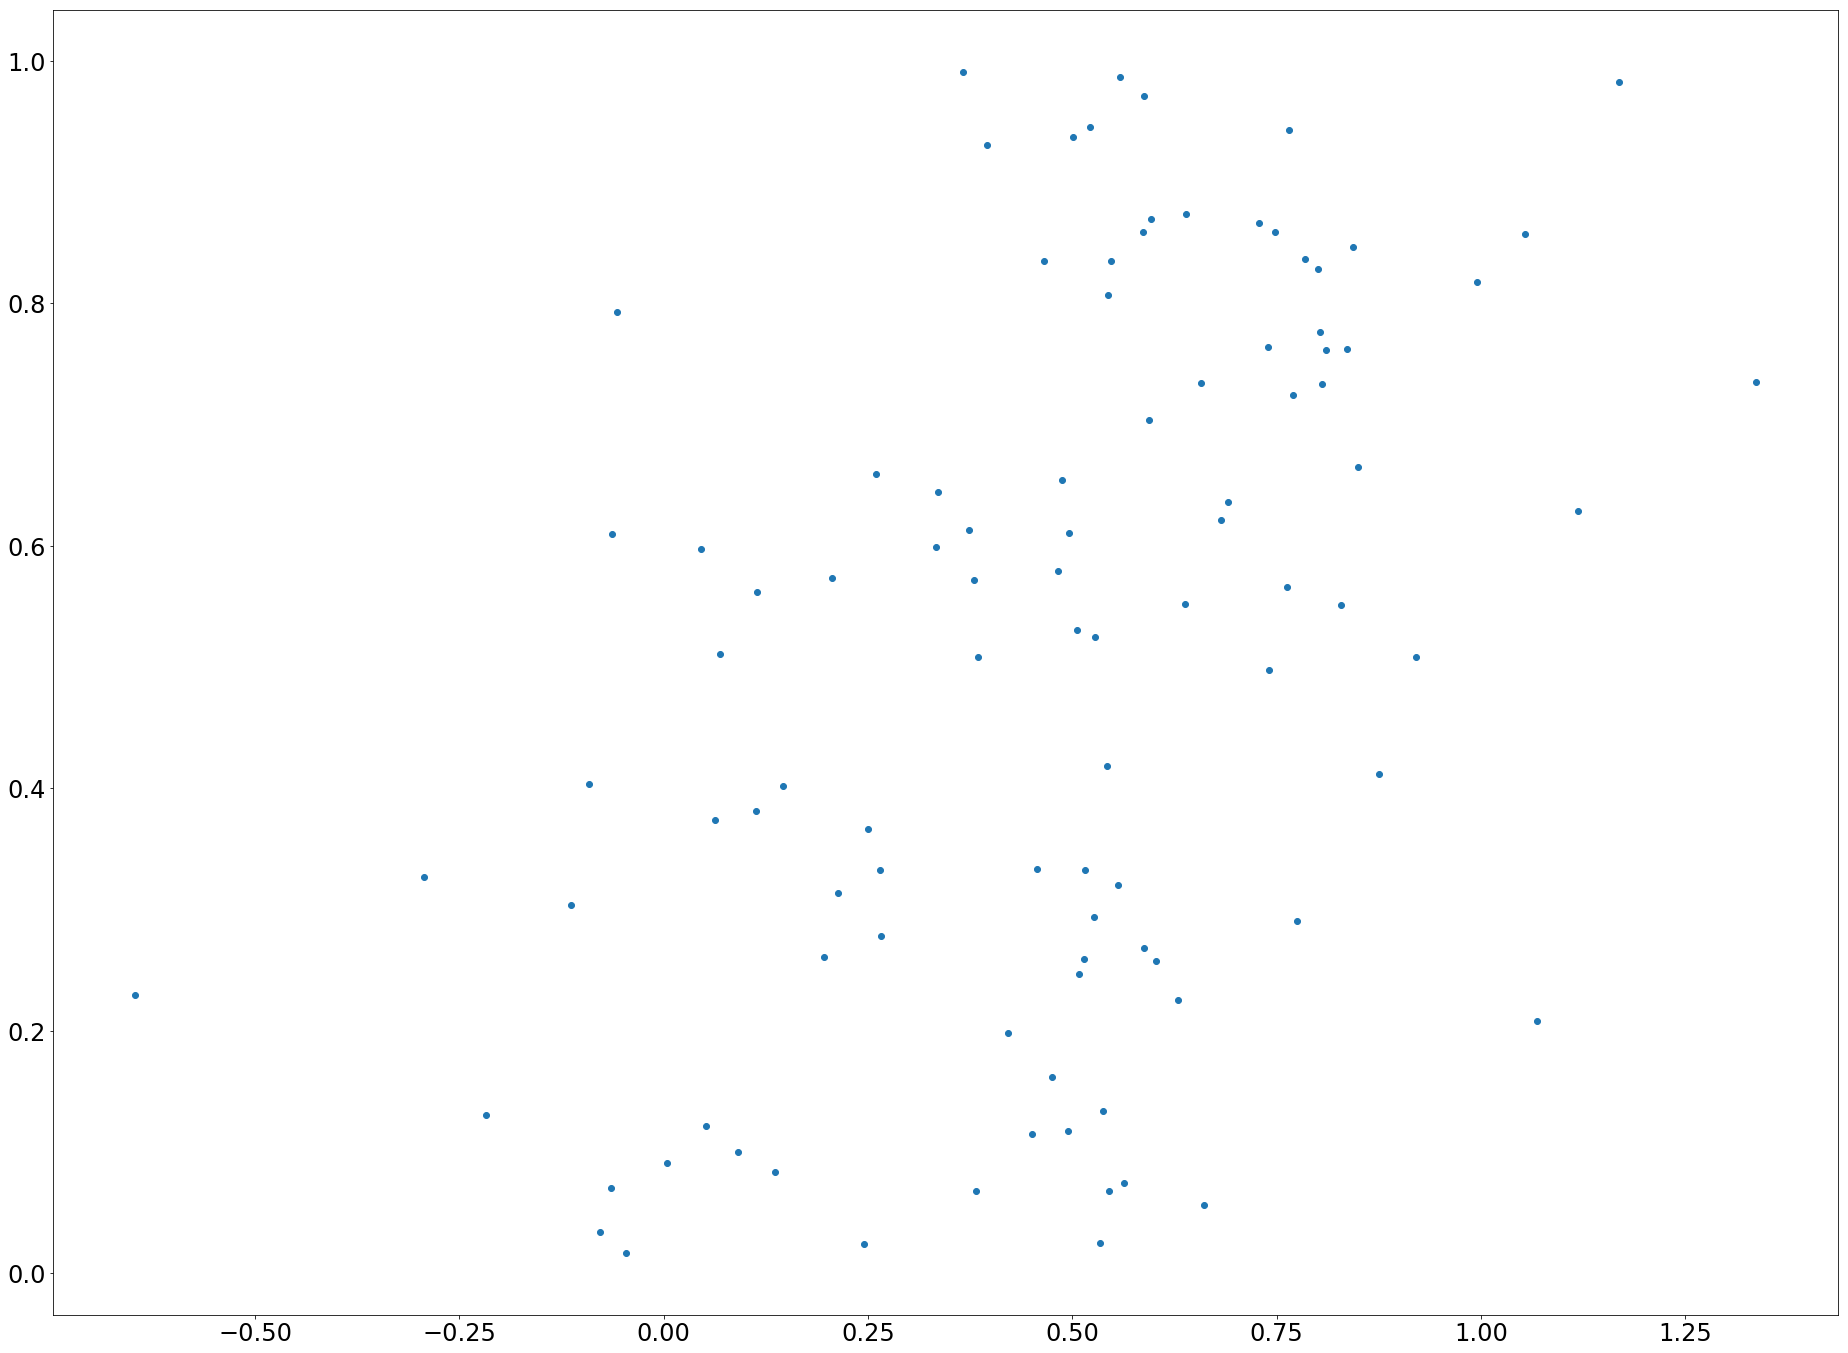

In [122]:
# write your code here
X = np.random.uniform(0,1, 100)
def f(a, b, n, X):
    return a + b * X + math.sqrt(.1) * np.random.randn(n)

Y = f(.2, .5, 100, X)
# print(X)
# print(Y)
plt.scatter(Y, X)
plt.show()

## 3. Least squares ##
Using the sequences ${y_i}$ and ${x_i}$ from **2**, implement the matrix form of the least squares method to determine estimates of the parameters $a$ and $b$ (which we denote as $a'$ and $b'$) assuming that $y_i=a+bx_i$.

**Hints**
* The formula for the matrix form of least squares is given by: $A=(X.X^T)^{-1}.X^T.Y$ where $A=[a',b']$.
* It is important that you keep track of the dimensions of your matrices, especially $X$. Remember that $X^T \cdot X$ should give a 2x2 matrix.
* Because of the equation being in the form of $y_i=a+bx_i$ the first column of X should be all 1s.
* You don't need to use your code for matrix inverse and can instead use the function `np.linalg.inv`.

In [123]:
# write your code here


def leastSquares(X, Y):
    Y = np.matrix(Y).T
    Xones = np.matrix([np.ones(X.size), X]).T
    ans = np.linalg.inv(Xones.T.dot(Xones)).dot(Xones.T).dot(Y)
    return ans
A = leastSquares(X, Y)
print("A = {}".format(A))


A = [[0.21096761]
 [0.52286907]]


### Why aren't the values of a and b the same as in the original equation?

### Answer: 

Write your answer here.

## 4. Line fitting and plotting

Draw the line defined by the estimated values of $a'$ and $b'$ on top of the scatter plot generated in point **2**.

a = 0.2109676059484018


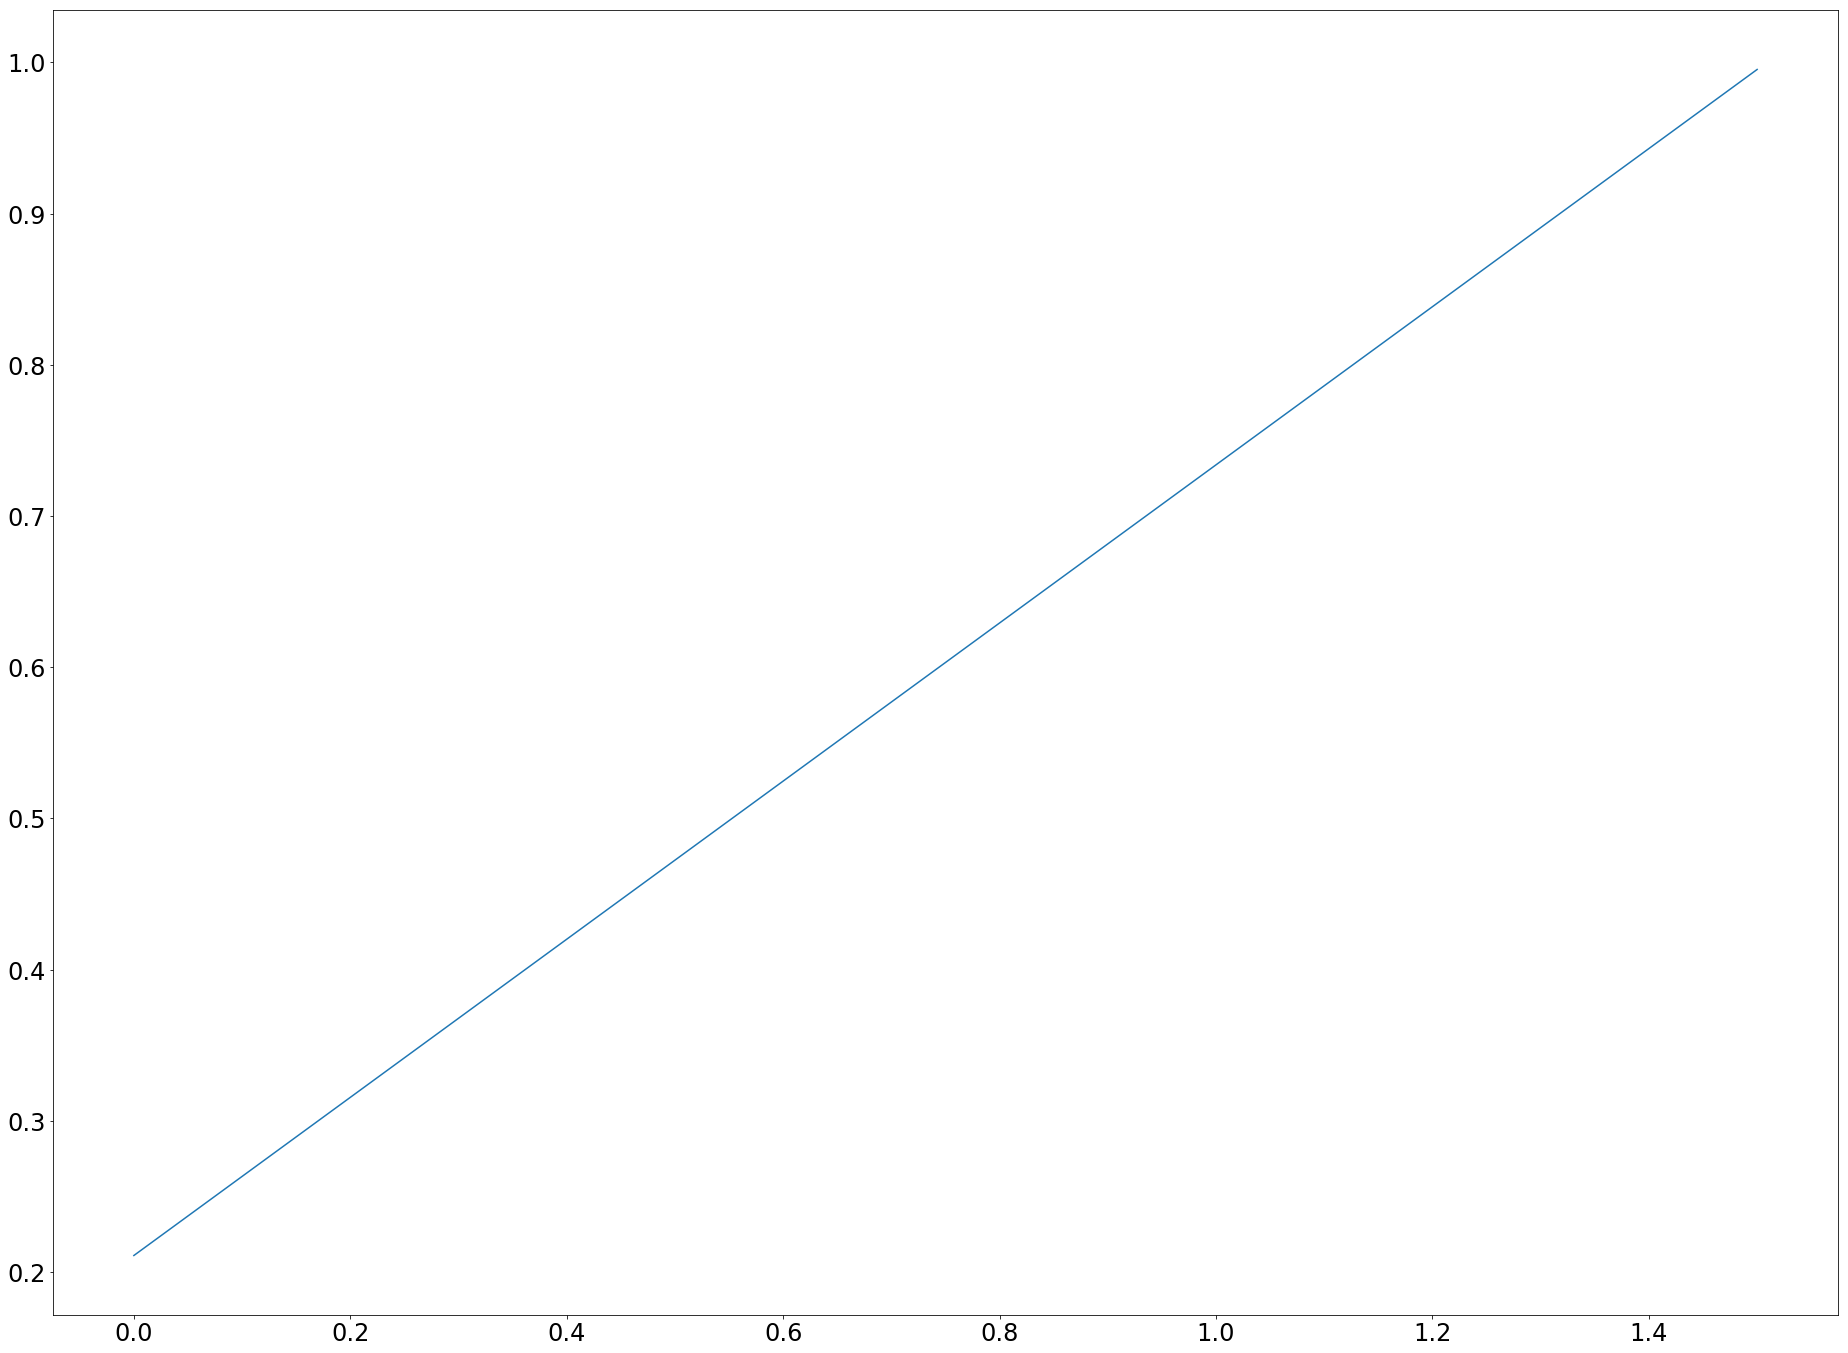

In [124]:
# write your code here
a = A.item(0)
b = A.item(1)

print("a = {}".format(a))

x = np.linspace(0, 1.5, 2)
plt.plot(x, x * b + a)
plt.show()

## 5. Outliers

Add a few outliers to your data. For example, add the points $\{(0.5, 5), (0.6, 5), (0.7, 5)\}$ to the sampled sequences from **2**.

Re-estimate the best line that fits the data after the addition of the outliers.

Plot the best fit line before and after the outlier data, in a way similar to the figure below (including the colouring and the legend).


### Hint
* Both `plot` and `scatter` have an optional parameter label which allows you to label each series for the legend.
* Both `plot` and `scatter` have an optional parameter c which can be passed a colour, e.g. `c='r'` will set the colour to red.
* `ax.legend` will create a legend automatically as long as your series have been labelled.

![Line fit](lineFit.jpg)

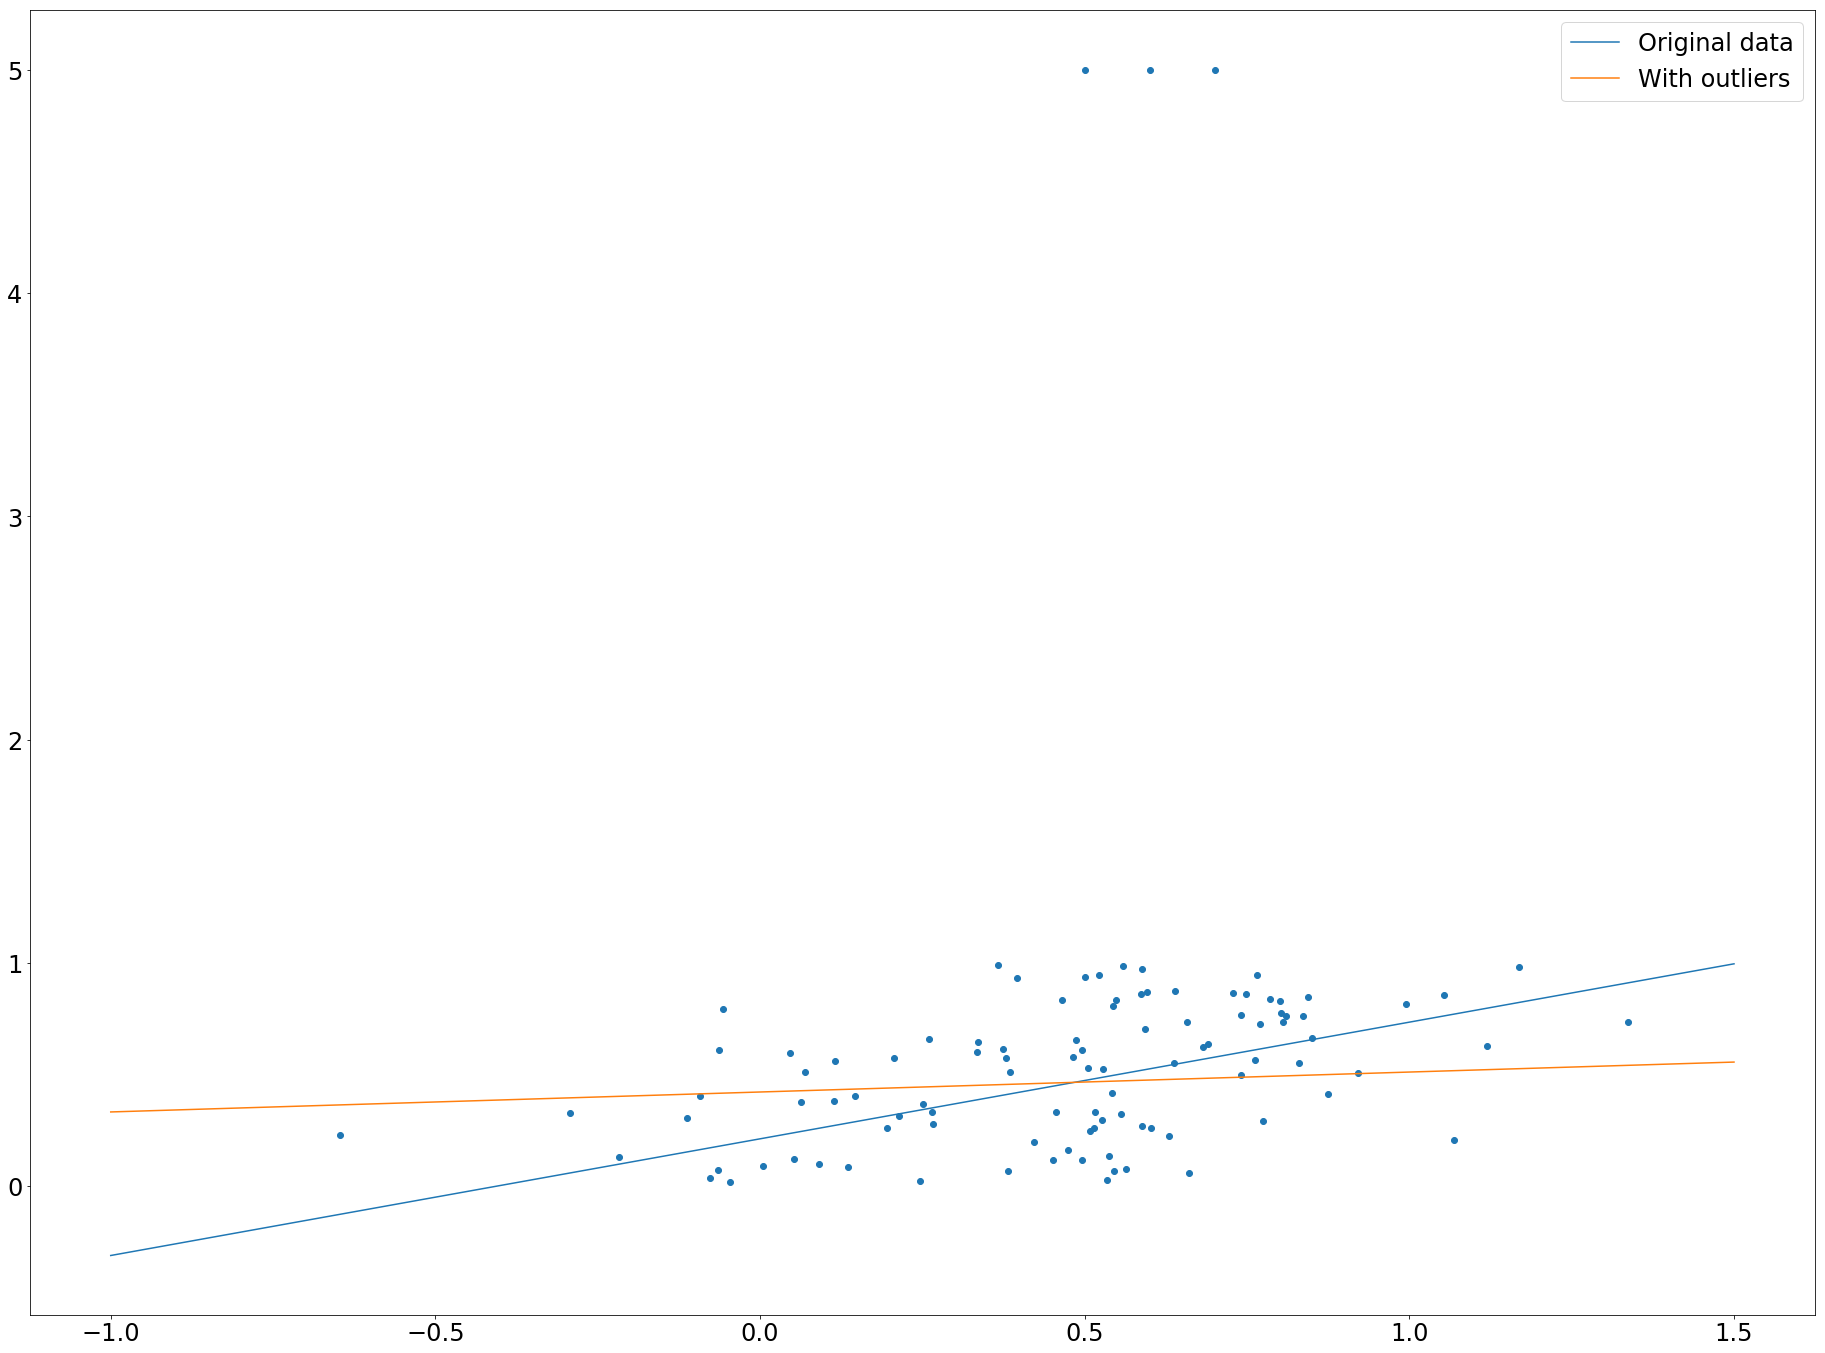

In [125]:
# write your code here
B = leastSquares(X, Y)
X1 = np.hstack((X, [5,5,5]))
#print(Y)
#print("Y shape = {}".format(Y.shape))
append = [.5, .6, .7]
#print("Append shape = {}".format(append.shape))
Y1 = np.hstack((Y, append))

C = leastSquares(X1,Y1)

a1 = C.item(0)
b1 = C.item(1)

x = np.linspace(-1, 1.5, 2)
plt.plot(x, x * b + a, label = "Original data")
plt.plot(x, x * b1 + a1, label = "With outliers")
plt.scatter(Y1,X1)
plt.legend()
plt.show()

## 6. Calculating the error

We can now calculate the error in the predicted line using sum squared error (which is what least squares regression is minimising).

Calculate the error of the best fit line and the best fit line with outliers.

**Hint**
* The sum squared error formula is $\sum_i (\hat{y}_i - y_i)^2$ where $\hat{y}_i = a + bx_i$.

In [129]:
# write your code here

err1 = sum(map(lambda x: x * x, f(a, b, 100, X) - Y))
err2 = sum(map(lambda x: x * x, f(a1, b1, 103, X1) - Y1))
print("Error without outliers: {} and with: {}".format(err1, err2))

Error without outliers: 14.826660361272067 and with: 19.582975577954585


## 7. Moving to a non-linear system

So far we have been using the least squares method only to find the line of best fit for linear equations, however it can be extended quite easily to certain non-linear lines.

Adapting this method lies in the creation of the $X$ matrix. The matrix we construct has two columns, the first a column of ones and the second a column of x values. Note how each column represents a function applied to x: $x^0$, $x^1$.

If we were instead given the function $y = a + be^x$ to apply the least squares method we can just modify how we define $X$: instead of the second column including $x^1$ we can insert $e^x$.

Given the set of points below, calculate $a$ and $b$ assuming they fit an exponential curve.
### Hint
* `np.exp(new_x)` will define the new column to add.

In [146]:
new_x = np.array([-5, -4, -2, -1.5, -0.5, 0.5, 0.75, 1, 1.3, 1.9, 2.1, 2.4, 2.8, 3, 3.2])
new_y = np.array([0.407, 0.42, 0.549, 0.645, 1.07, 2.21, 2.73, 3.39, 4.44, 7.75, 9.38, 12.5, 18.5, 22.5, 27.4])

# write your code here

ans = leastSquares(np.exp(new_x), new_y)
print(ans)

[[0.39780844]
 [1.10035113]]


### Visualising the result
We can now visualise the fitted line as a figure as before using `plot`. Due to the non-linear nature of the equation we can use `np.linspace(-5, 3.2, 100)` which returns 100 evenly spaced numbers in the interval between -5 and 3.2. 

Create a graph plotting both the original points and the fitted line as below:
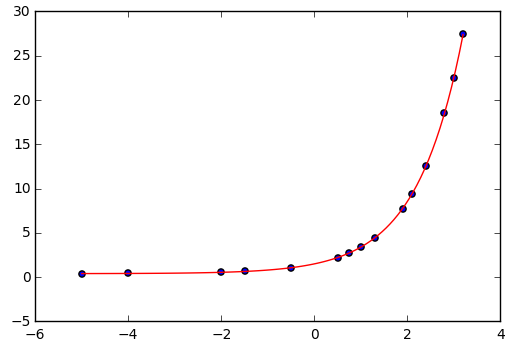

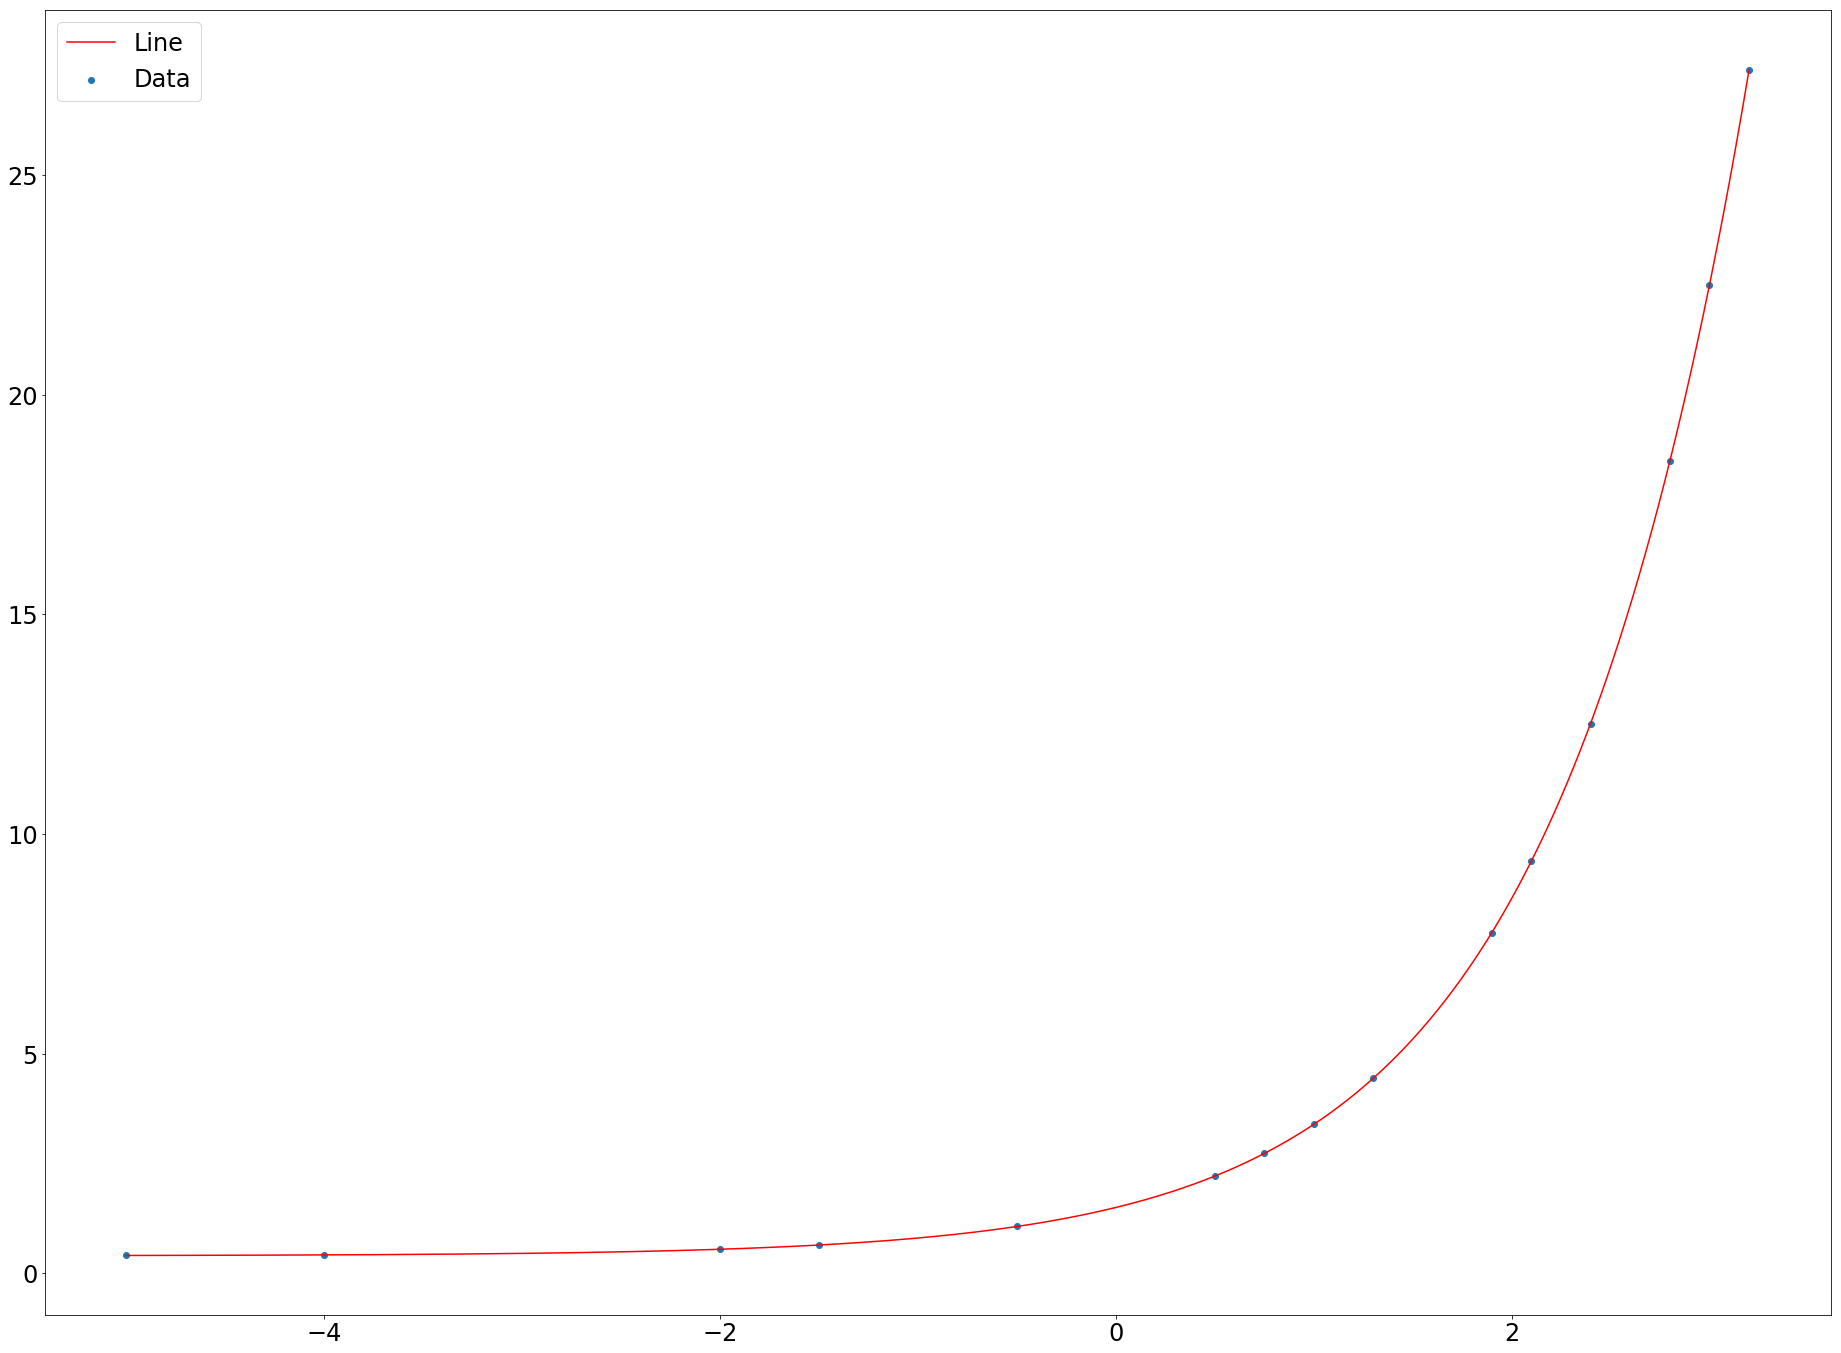

In [142]:
# write your code here

a = ans.item(0)
b = ans.item(1)

linspace = np.linspace(-5, 3.2, 1000)
plt.scatter(new_x, new_y, label = "Data")
plt.plot(linspace, a + b * np.exp(linspace), label="Line", c = 'r')
plt.legend()
plt.show()

### What other types of functions can we extend this to?

For example why can't we fit to the function $y=a \cdot e^{bx}$?

### Answer

Write your answer here.